<a href="https://colab.research.google.com/github/nonohuang0819/kaggle/blob/main/task2/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np 
import pandas as pd 
import os
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import category_encoders as ce
#from google.colab import drive
#drive.mount("/content/drive")

In [58]:
filepath = "../Train/task2/introml_2024_task2_train.csv"
df = pd.read_csv(filepath)
df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,class
0,f00,f11,f20,f30,f40,f50,f61,f71,f81,0.3839,1.5223,0.5516,0.0579,2.2677,1.1361,0.9204,1.8718,0.7433,C0
1,f00,f10,f20,f30,f40,f50,f61,f70,f81,1.4089,1.7259,0.9097,1.5688,0.9065,1.2314,0.9521,1.5515,0.7560,C0
2,f01,f10,f20,f30,f41,f50,f60,f71,f80,0.2752,0.2936,0.5023,1.6234,1.7168,1.3118,0.3520,2.5584,2.0897,C0
3,f01,f11,f20,f31,f41,f50,f60,f70,f80,0.1777,0.1441,2.1431,1.3822,2.1976,0.7040,0.1160,0.1408,2.0033,C0
4,f00,f11,f20,f30,f40,f50,f60,f71,f80,0.1692,0.2393,2.5039,0.8708,1.6206,0.6319,0.6632,0.6857,0.6148,C0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,f01,f10,f20,f30,f41,f50,f61,f71,f80,0.3347,0.7849,0.0796,0.7342,0.5169,0.7413,0.4696,0.6958,0.6273,C4
3996,f00,f10,f20,f30,f41,f50,f61,f70,f80,0.2989,0.6772,0.0325,2.4367,0.2669,1.1615,0.4936,0.3491,0.8280,C4
3997,f00,f10,f20,f31,f41,f50,f61,f71,f80,0.5245,0.6542,1.0248,1.4574,0.1816,0.5517,0.1486,0.3595,1.6582,C4
3998,f00,f10,f20,f30,f41,f50,f61,f70,f80,0.7995,0.2713,0.4453,1.1236,1.0424,0.4081,1.0728,0.5401,1.0678,C4


In [59]:
# 前處理
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'class'] # 0/1變數

for c in cols:
    df[c] = df[c].apply(lambda x: int(x[-1]))

df

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,class
0,0,1,0,0,0,0,1,1,1,0.3839,1.5223,0.5516,0.0579,2.2677,1.1361,0.9204,1.8718,0.7433,0
1,0,0,0,0,0,0,1,0,1,1.4089,1.7259,0.9097,1.5688,0.9065,1.2314,0.9521,1.5515,0.7560,0
2,1,0,0,0,1,0,0,1,0,0.2752,0.2936,0.5023,1.6234,1.7168,1.3118,0.3520,2.5584,2.0897,0
3,1,1,0,1,1,0,0,0,0,0.1777,0.1441,2.1431,1.3822,2.1976,0.7040,0.1160,0.1408,2.0033,0
4,0,1,0,0,0,0,0,1,0,0.1692,0.2393,2.5039,0.8708,1.6206,0.6319,0.6632,0.6857,0.6148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,0,0,0,1,0,1,1,0,0.3347,0.7849,0.0796,0.7342,0.5169,0.7413,0.4696,0.6958,0.6273,4
3996,0,0,0,0,1,0,1,0,0,0.2989,0.6772,0.0325,2.4367,0.2669,1.1615,0.4936,0.3491,0.8280,4
3997,0,0,0,1,1,0,1,1,0,0.5245,0.6542,1.0248,1.4574,0.1816,0.5517,0.1486,0.3595,1.6582,4
3998,0,0,0,0,1,0,1,0,0,0.7995,0.2713,0.4453,1.1236,1.0424,0.4081,1.0728,0.5401,1.0678,4


In [60]:
# 變數分析
for c in cols: # f0 ~ f8 0, 1的比例
    tmp = df[c].value_counts(normalize=True)
    print(f'{c} : [{tmp[0]}, {tmp[1]}]')
print(df['class'].value_counts(normalize=True))

f0 : [0.7975, 0.2025]
f1 : [0.60575, 0.39425]
f2 : [0.6155, 0.3845]
f3 : [0.88475, 0.11525]
f4 : [0.45675, 0.54325]
f5 : [0.83375, 0.16625]
f6 : [0.17875, 0.82125]
f7 : [0.28525, 0.71475]
f8 : [0.8395, 0.1605]
class : [0.2, 0.2]
class
0    0.2
1    0.2
2    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64


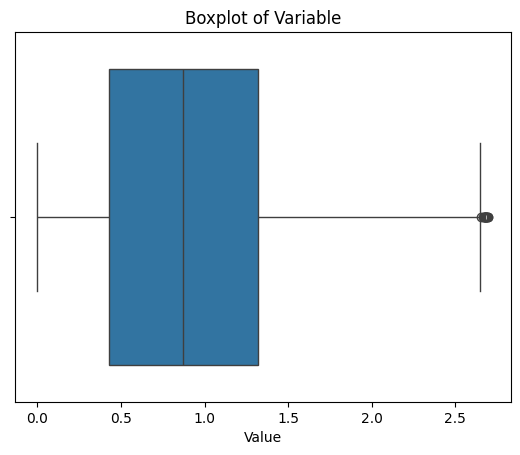

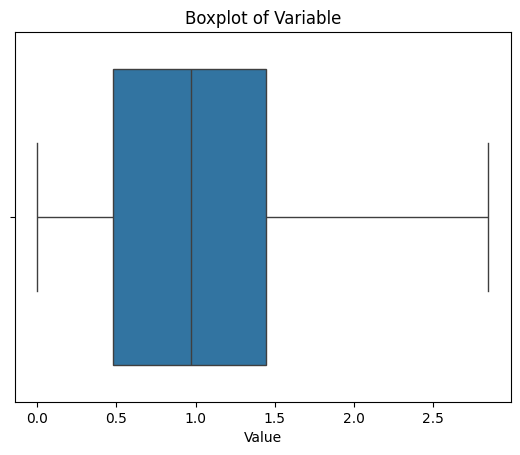

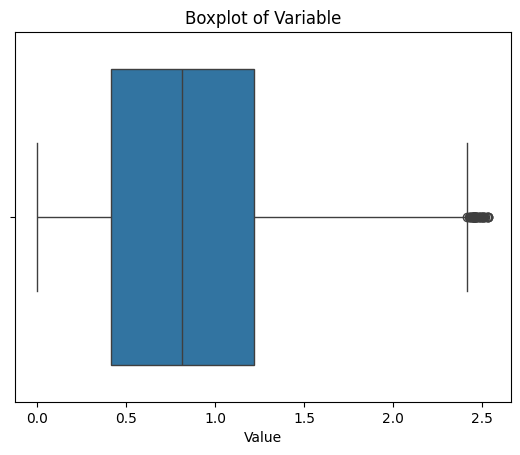

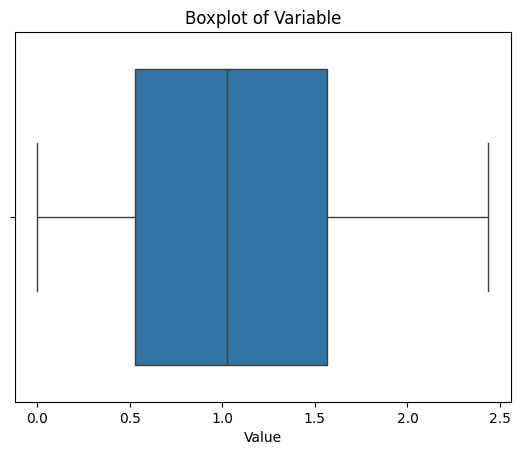

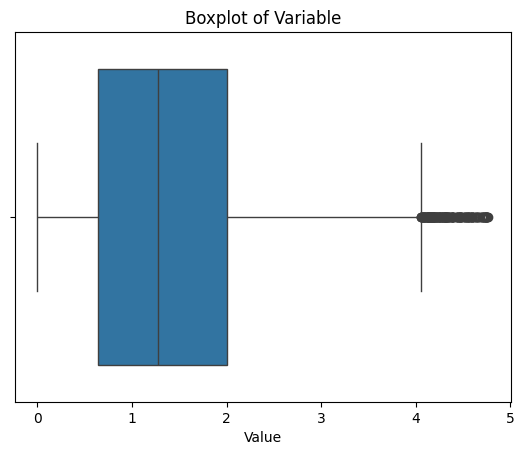

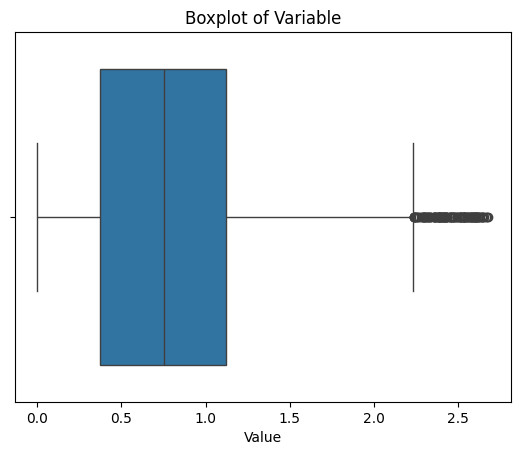

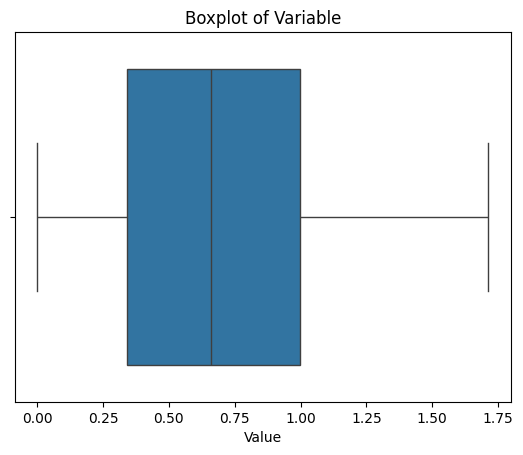

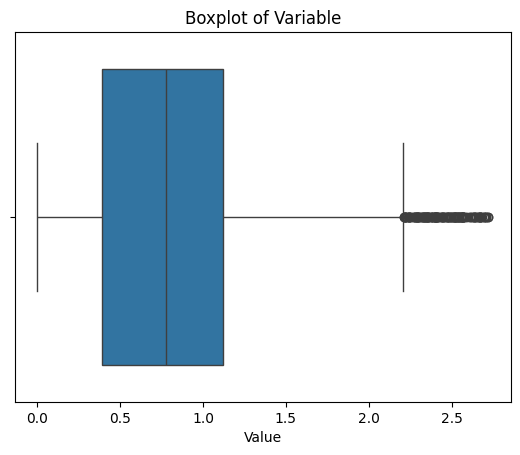

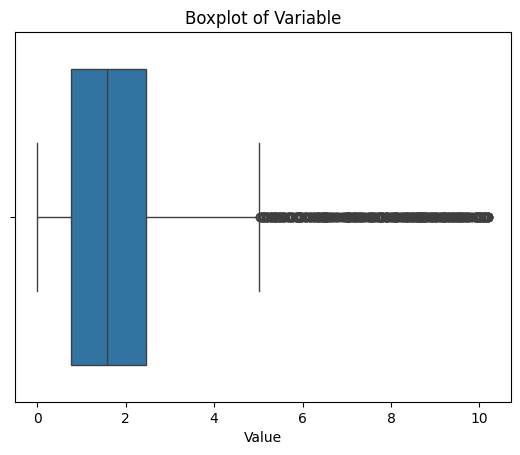

In [46]:
col2 = ['f9', 'f10','f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17']
for c in col2:
        
    sns.boxplot(x=df[c])
    plt.title('Boxplot of Variable')
    plt.xlabel('Value')
    plt.show()

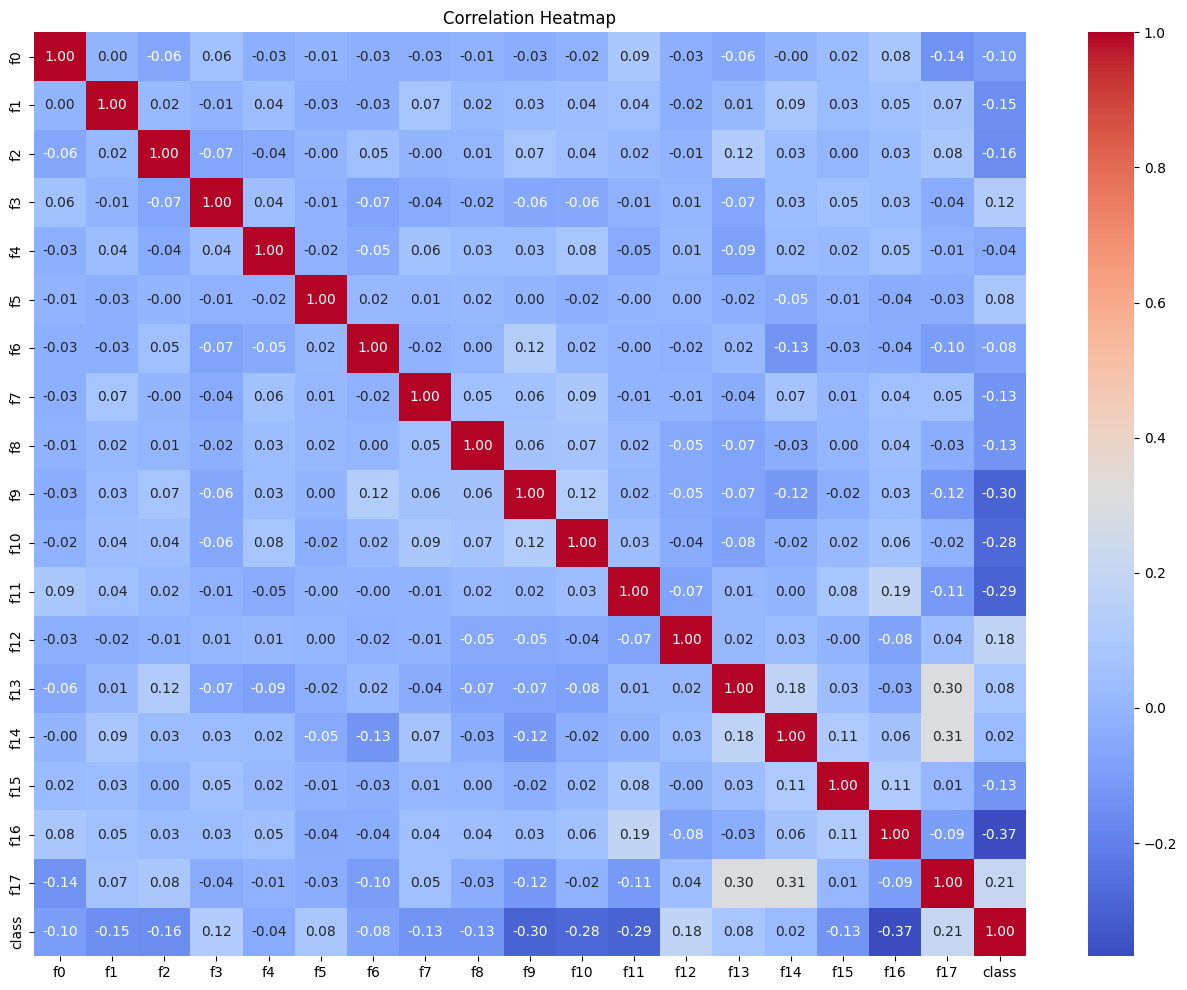

In [66]:
# 计算相关性矩阵
correlation_matrix = df.corr()
plt.figure(figsize=(16, 12))
# 创建热图
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [74]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. 模型预测
y_pred = model.predict(X_test)

# 6. 性能评估
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.865
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88       171
           1       0.80      0.84      0.82       177
           2       0.82      0.83      0.83       156
           3       0.98      0.89      0.93       142
           4       0.81      0.97      0.88       154

    accuracy                           0.86       800
   macro avg       0.88      0.87      0.87       800
weighted avg       0.87      0.86      0.87       800



In [88]:
ansfile = "../Train/task2/introml_2024_task2_test_NO_answers_shuffled.csv"
ans = pd.read_csv(ansfile)
cols = ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
for c in cols:
    ans[c] = ans[c].apply(lambda x: int(x[-1]))

ans_pred = model.predict(ans.iloc[:, 1:])

trans = np.vectorize(lambda x : "C"+str(x))
ans_pred = trans(ans_pred)
submit = pd.DataFrame({
    "id" : range(0, len(ans_pred)),
    "class" : ans_pred
})

submit.to_csv('../Submit/task2/submission.csv', index=False)



In [89]:
# Submition : 3 per day
input() # 避免誤點到
!kaggle competitions submit -c introml-nccu-2024-task-2 -f ../Submit/task2/submission.csv -m "Message"

100%|██████████████████████████████████████| 6.74k/6.74k [00:00<00:00, 7.23kB/s]
Successfully submitted to introml@nccu_2024_task2